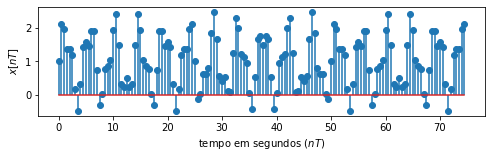

In [67]:
#importa as bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt
%matplotlib inline

# Criando vetor TEMPO
N = 150 # quantidade de amostras
T = 0.5 # periodo de amostragem
t0 = 0 # tempo inicial
# n = np.linspace(t0, (N-1)*T, N) #vetor TEMPO (opção 1)
n = np.arange(t0, N*T, T) #vetor TEMPO (opção 2)

# Criando o vetor SINAL
x = np.sin(0.44*np.pi*n) + 0.5*np.sin(np.pi*n) + 1

# Plotando gráfico do sinal
plt.figure(figsize=(8,2))
# plt.plot(n, x, '-')
plt.stem(n, x, use_line_collection=True)
plt.xlabel("tempo em segundos ($nT$)")
plt.ylabel("$x[nT]$");

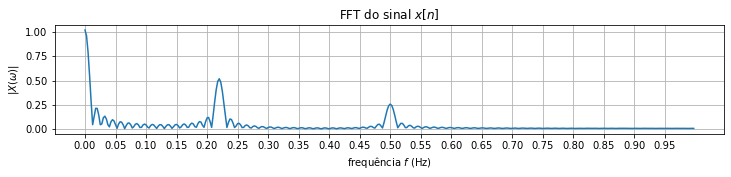

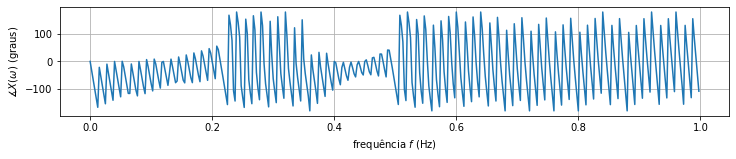

In [68]:
from scipy.fft import fft

Nfft = 800 #número de pontos para FFT

X_f = fft(x, Nfft) #calcula a FFT
X_f = X_f/N #constante da transformada
X_f = X_f[0:Nfft//2] #retirar espelhamentos na frequência
# X_f[1:] = X_f[1:]*2 #dobra módulo nas frequências diferentes de zero

# Frequência fundamental
# w0 = 2*np.pi/Nfft # rad/amostra
# w0 = 2*np.pi/(Nfft*T) # rad/s
f0 = 1/(Nfft*T) # Hz
freqs = np.arange(Nfft)*f0
freqs = freqs[0:Nfft//2]

# Plotando gráfico do sinal
plt.figure(figsize=(12,2))
plt.plot(freqs, np.abs(X_f))
# plt.stem(freqs, np.abs(X_f))
plt.grid()
plt.xlabel("frequência $f$ (Hz)");
plt.ylabel("$|X(\omega)|$");
plt.title("FFT do sinal $x[n]$")
plt.xticks(np.arange(0,1,0.05));

plt.figure(figsize=(12,2))
plt.plot(freqs, np.angle(X_f, deg=True))
plt.grid()
plt.xlabel("frequência $f$ (Hz)");
plt.ylabel("$\measuredangle X(\omega)$ (graus)");

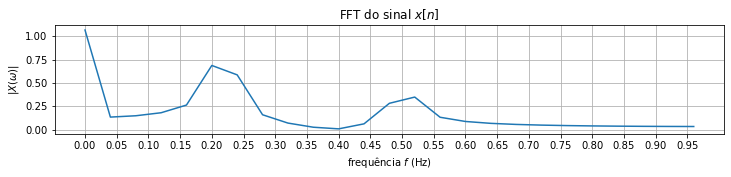

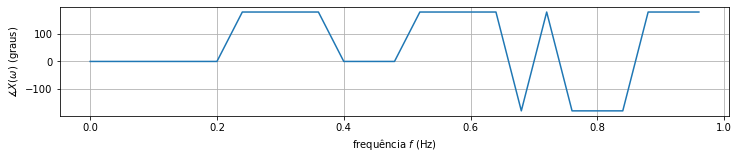

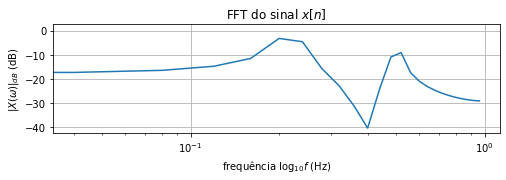

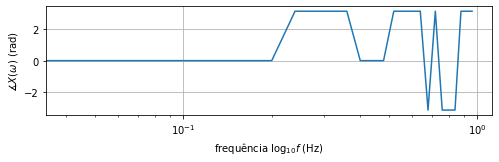

In [43]:
# FFT com módulo em dB e fase em radianos

# Calculando magnitude em dB
X_f_dB = 20*np.log10(np.abs(X_f))

# Plotando gráfico do sinal
plt.figure(figsize=(8,2))
plt.semilogx(freqs, X_f_dB)
plt.grid()
plt.xlabel("frequência $\log_{10} f$ (Hz)");
plt.ylabel("$|X(\omega)|_{dB}$ (dB)");
plt.title("FFT do sinal $x[n]$");

plt.figure(figsize=(8,2))
plt.semilogx(freqs, np.angle(X_f, deg=False))
plt.grid()
plt.xlabel("frequência $\log_{10} f$ (Hz)");
plt.ylabel("$\measuredangle X(\omega)$ (rad)");